In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import datetime

In [13]:
def normalize(df_result: pd.DataFrame) -> pd.DataFrame:
    if df_result.shape[1] != 9:
        raise ValueError(f"Input has {df_result.shape[1]} columns; should be 9")
    df=df_result.set_axis(
        [
            "time",
            "acc_x",
            "acc_y",
            "acc_z",
            "pitch",
            "roll",
            "yaw",
            "pressure",
            "flag",
        ],
        axis='columns'
    )
    return df

def score(df_result: pd.DataFrame, df_target: pd.DataFrame) -> float:
    len_df = len(df_target.index)
    df_trunc = df_result[df_result["flag"] >= 1].head(len_df).reset_index(drop=True)
    score = np.sqrt(np.mean((df_trunc['pressure'].values-df_target['pressure'])**2))
    return score, df_trunc

In [61]:
def print_result(df_result:pd.DataFrame, df_target: pd.DataFrame, dir_out='./output/', filename=datetime.datetime.now().strftime("%Y-%m-%d %H%M%S")):
  df = normalize(df_result)
  score_val, df_trunc = score(df,df_target)
  fig,axes=plt.subplots(3,1,figsize=(8,12))
  
  fig.suptitle(f'Score = {score_val:.2f}')
  fig.set_tight_layout('tight')
  # Accel
  axes[0].set_xlabel('Time[s]')
  axes[0].set_ylabel('Acceleration[$m/s^2$]')
  axes[0].plot(df_trunc['acc_x'],c='red',label='acc_x')
  axes[0].plot(df_trunc['acc_y'],c='green',label='acc_y')
  axes[0].plot(df_trunc['acc_z'],c='blue',label='acc_z')
  axes[0].legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=1, )

  # Orientation
  axes[1].set_xlabel('Time[s]')
  axes[1].set_ylabel('Angle[deg]')
  axes[1].plot(df_trunc['pitch'],c='red',label='pitch')
  axes[1].plot(df_trunc['roll'],c='green',label='roll')
  axes[1].plot(df_trunc['yaw'],c='blue',label='yaw')
  axes[1].legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=1, )

  # Orientation
  axes[2].set_xlabel('Time[s]')
  axes[2].set_ylabel('Pressure[mbar]')
  axes[2].plot(df_trunc['pressure'],c='black',label='Result')
  axes[2].plot(df_target['pressure'],c='black',ls='--',label='Target')
  axes[2].legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=1, )
  
  # Output
  path_out = Path(dir_out)
  if not path_out.exists():
     path_out.mkdir(parents=True, exist_ok=True)
  plt.savefig(path_out.joinpath(f"{filename}.png"), bbox_inches="tight")
  plt.savefig(path_out.joinpath(f"{filename}.pdf"), bbox_inches="tight")

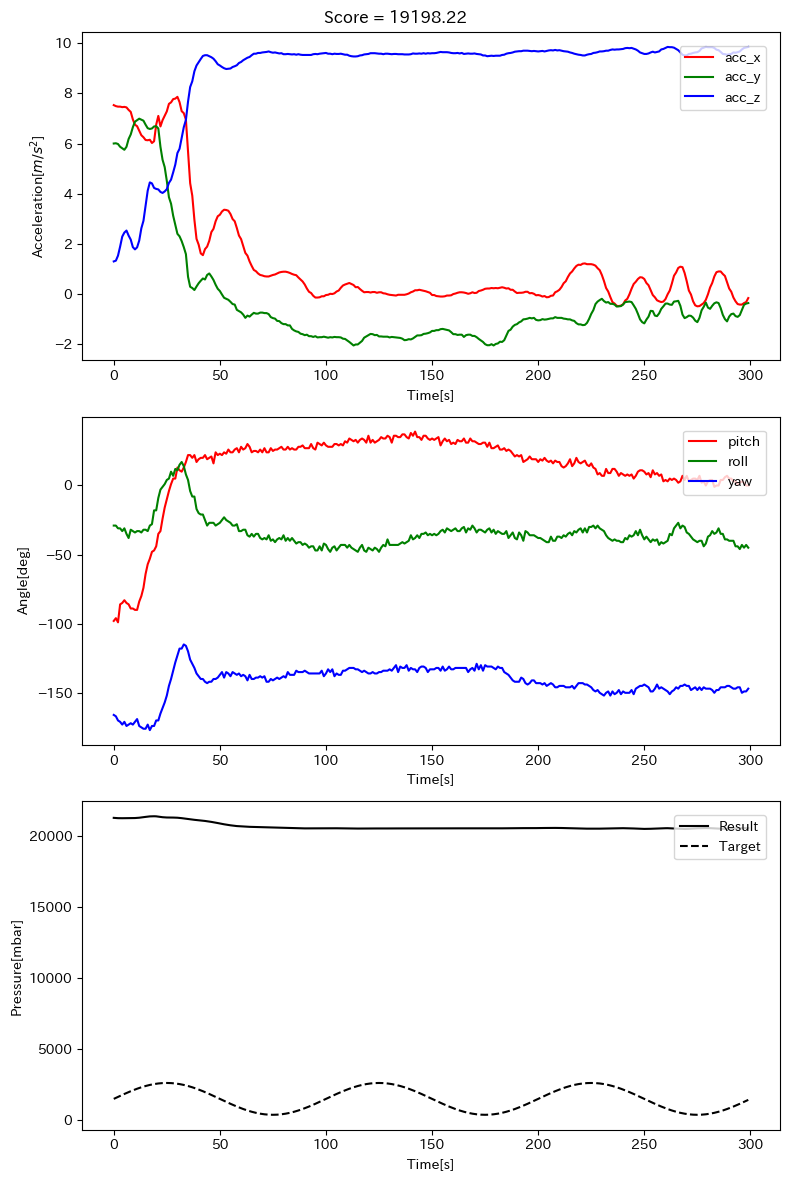

In [62]:
print_result(pd.read_csv("rawdata_submit_modified.csv"), pd.read_csv("sine.csv"))